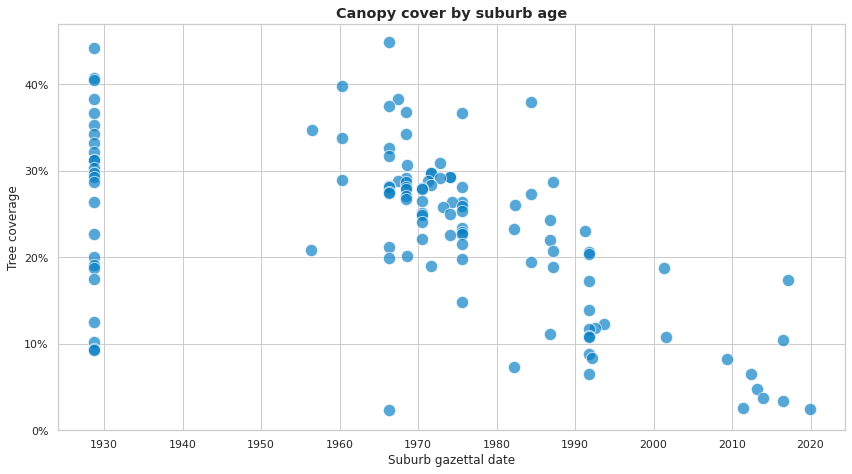

In [17]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, matplotlib.ticker as ticker, matplotlib.dates as mdates
sns.set(style="whitegrid")

def parse_string(string):
    string = string.split(" ")
    hot = float(string[-1])
    canopy = float(string[-2])
    if string[0] in ["Woden", "Canberra", "Molonglo", "Weston", "Paddys"]:
        district = " ".join(string[:2])
        suburb = " ".join(string[2:-2])
    else:
        district = string[0]
        suburb = " ".join(string[1:-2])
    return [suburb, canopy, hot]    

data = pd.read_csv("trees.txt", header=None, names=["string"])
df = pd.DataFrame(columns=["suburb", "canopy", "heat"])

for i in data.index:
    df.loc[i] = parse_string(data.at[i, "string"])

df.set_index("suburb", inplace=True)

def parse_suburb(string):
    string = string.split(" ")
    if string[0].isupper():
        date_index = [x.isnumeric() for x in string].index(True)
        suburb = " ".join([x[0].upper() + x[1:].lower() for x in string[:date_index]])
        if ("'" in suburb) | (suburb[:2] == "Mc"):
            suburb = suburb[:2] + suburb[2].upper() + suburb[3:]
        date = pd.Timestamp(f"{' '.join(string[date_index:date_index + 3])}")
        df.at[suburb, "gazetted"] = date

data = pd.read_csv("suburbs.txt", header=None, names=["string"])

for i in data.index:
    parse_suburb(data.at[i, "string"])
    
df.dropna(inplace=True)

fig, ax = plt.subplots(
    tight_layout=True,
    figsize=(12, 6.75)
)

sns.scatterplot(x="gazetted", y="canopy", ax=ax, data=df, s=150, alpha=.67, color="#037cc2")
ax.set_ylim(0, None)
plt.title("Canopy cover by suburb age", font={"size":"large", "weight":"bold"})
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(100, 0))
plt.xlabel("Suburb gazettal date")
plt.ylabel("Tree coverage")
plt.savefig("suburbAge.jpg")


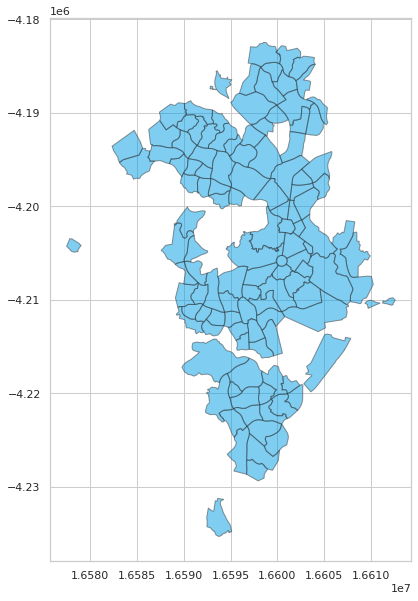

In [18]:
import geopandas as gpd
import contextily as cx

suburbs = gpd.read_file("suburbsLocales.zip")
suburbs = suburbs[["SAL_NAME21", "STE_CODE21", "AREASQKM21", "geometry"]]
suburbs.columns = ["suburb", "state", "area", "geometry"]
suburbs = suburbs[
    (suburbs["state"] == "8") &
    (suburbs["area"] > 0) &
    (suburbs["suburb"].apply(
        lambda x: "Remainder" not in x
    ))
]
suburbs = suburbs.to_crs(epsg=3857)
ax = suburbs.plot(
    figsize=(10, 10),
    alpha=.5,
    edgecolor="#333",
    color="#009de5"
)

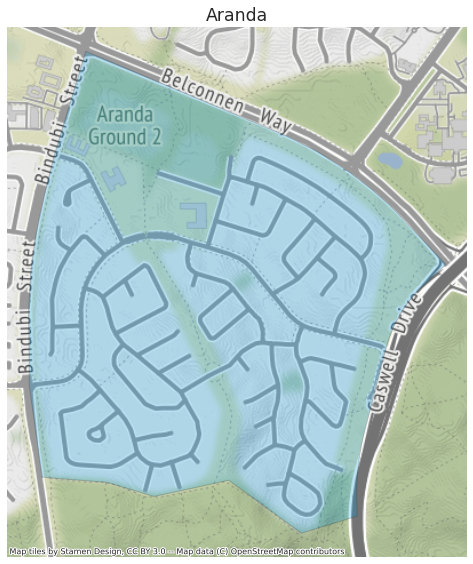

In [65]:
fig, ax = plt.subplots(
    figsize=(8, 8),
    tight_layout=True
)
suburbs[suburbs.suburb == "Aranda"].plot(
    ax=ax,
    edgecolor="#333",
    color="#009de5",
    alpha=.25,
)
cx.add_basemap(ax, source=cx.providers.Stamen.Terrain, zoom=15)
ax.set_axis_off()
plt.title("Aranda", fontsize="x-large")
plt.savefig("aranda.jpg")

In [23]:
cx.providers

{'OpenStreetMap': {'Mapnik': {'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.Mapnik'},
  'DE': {'url': 'https://{s}.tile.openstreetmap.de/tiles/osmde/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.DE'},
  'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'bounds': [[45, 5], [48, 11]],
   'name': 'OpenStreetMap.CH'},
  'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
   'max_zoom': 20,
   'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.France'},
  'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
   'name': 'OpenStreetMap.HOT'},
  'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'bounds': [[46.2, -5.5], [50, 0.7]],
   'name': 'OpenStreetMap.BZH'},
  'BlackAndWhite': {'url': 'http://{s}.tiles.wmflabs.org/bw-mapnik/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'attribution': '(C) OpenStreetMap contributors',
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'name': 'OpenStreetMap.BlackAndWhite'}},
 'OpenSeaMap': {'url': 'https://tiles.openseamap.org/seamark/{z}/{x}/{y}.png',
  'html_attribution': 'Map data: &copy; <a href="http://www.openseamap.org">OpenSeaMap</a> contributors',
  'attribution': 'Map data: (C) OpenSeaMap contributors',
  'name': 'OpenSeaMap'},
 'OPNVKarte': {'url': 'https://tileserver.memomaps.de/tilegen/{z}/{x}/{y}.png',
  'max_zoom': 18,
  'html_attribution': 'Map <a href="https://memomaps.de/">memomaps.de</a> <a href="http://creativecommons.org/licenses/by-sa/2.0/">CC-BY-SA</a>, map data &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
  'attribution': 'Map memomaps.de CC-BY-SA, map data (C) OpenStreetMap contributors',
  'name': 'OPNVKarte'},
 'OpenTopoMap': {'url': 'https://{s}.tile.opentopomap.org/{z}/{x}/{y}.png',
  'max_zoom': 17,
  'html_attribution': 'Map data: &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, <a href="http://viewfinderpanoramas.org">SRTM</a> | Map style: &copy; <a href="https://opentopomap.org">OpenTopoMap</a> (<a href="https://creativecommons.org/licenses/by-sa/3.0/">CC-BY-SA</a>)',
  'attribution': 'Map data: (C) OpenStreetMap contributors, SRTM | Map style: (C) OpenTopoMap (CC-BY-SA)',
  'name': 'OpenTopoMap'},
 'OpenRailwayMap': {'url': 'https://{s}.tiles.openrailwaymap.org/standard/{z}/{x}/{y}.png',
  'max_